# Plotting with Seaborn

Some practice for plotting with seaborn using my StatsReg-Strength data

## Normal plotting

### Go to Dropbox path

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
print(os.getcwd())
try:
    os.chdir(r'F:\Dropbox\Work\Data\behavioral\attention\StatisticalRegularities\locations\Salience\Exp1\beh\analysis')
except:
    os.chdir('/Users/michlf/Dropbox/Work/Data/behavioral/attention/StatisticalRegularities/locations/Salience/Exp1/beh/analysis')
print(os.getcwd())

/Users/michlf/Documents/GitHub/tutorials
/Users/michlf/Dropbox/Work/Data/behavioral/attention/StatisticalRegularities/locations/Salience/Exp1/beh/analysis


### Import data & prepare for plotting

In [2]:
import pandas as pd
data=pd.read_excel("analysisSAL1.xlsx", sheet_name=0)
data.head()

,acc,accuracy,answerQ1,answerQ2,answerQ3,average_response_time,avg_rt,background,bidi,canvas_backend,...,title,total_correct,total_response_time,total_responses,uniform_coordinates,width,Search RT > 200,previousTrial,DisDistance,location_priming
0,undefined,undefined,NaN,NaN,NaN,8386.849092,8386.849092,black,no,psycho,...,study_X,0,8386.849092,1,yes,1680,1,0,Dis-3,swap
1,undefined,undefined,NaN,NaN,NaN,8386.849092,8386.849092,black,no,psycho,...,study_X,0,8386.849092,1,yes,1680,1,0,Dis-4,swap
2,undefined,undefined,NaN,NaN,NaN,8386.849092,8386.849092,black,no,psycho,...,study_X,0,8386.849092,1,yes,1680,1,high N-1,Dis-1,swap
3,undefined,undefined,NaN,NaN,NaN,8386.849092,8386.849092,black,no,psycho,...,study_X,0,8386.849092,1,yes,1680,0,high N-1,Dis-2,swap
4,undefined,undefined,NaN,NaN,NaN,8386.849092,8386.849092,black,no,psycho,...,study_X,0,8386.849092,1,yes,1680,1,high N-1,Dis-0,swap


In [3]:
dataDis = pd.pivot_table(data[ ( data.cond_disPresent == "present") & (data["Search RT > 200"] == 1) & (data.correct == 1)],
                         values="responseTime", index="subject_nr", columns="cond_disLocation")
dataDis.head()

cond_disLocation,highProb,highProbOther,lowProb
subject_nr,,,
1,901.018699,887.546564,910.469638
2,624.201224,633.482632,675.431795
3,611.471170,615.974001,629.637109
4,812.504266,830.118105,841.104295
5,856.474157,893.741163,890.143513


In [4]:
dataDis = pd.melt( dataDis.reset_index(),id_vars="subject_nr", var_name="cond_disLocation",
                  value_vars=["highProb","highProbOther","lowProb"], value_name="responseTime")
dataDis.head()

,subject_nr,cond_disLocation,responseTime
0,1,highProb,901.018699
1,2,highProb,624.201224
2,3,highProb,611.471170
3,4,highProb,812.504266
4,5,highProb,856.474157


In [5]:
means = dataDis.groupby( ["cond_disLocation"])["responseTime"].mean().values
means

array([749.33169959, 759.65216089, 782.21368782])

### Plotting

In [6]:
import seaborn as sns
sns.violinplot(x="cond_disLocation", y="responseTime", data=dataDis)

In [7]:
dataDis = pd.pivot_table(data[ ( data.cond_disPresent == "present") & (data["Search RT > 200"] == 1) & (data.correct == 1)],
                         values="responseTime", index="subject_nr", columns=["cond_disFeature", "cond_disLocation"])
dataDis.head()

cond_disFeature       color1                                color2  \
cond_disLocation    highProb highProbOther     lowProb    highProb   
subject_nr                                                           
1                 898.085754    908.953247  911.006782  903.941353   
2                 625.086246    638.712805  690.283450  623.319234   
3                 608.643340    611.815357  636.985070  614.408722   
4                 795.916730    851.552072  851.441743  829.321786   
5                 873.133619    917.033359  912.548993  840.174899   

cond_disFeature                             
cond_disLocation highProbOther     lowProb  
subject_nr                                  
1                   868.417188  909.934529  
2                   628.130827  660.637482  
3                   620.225059  622.150507  
4                   809.150095  830.727984  
5                   871.532324  867.555131

In [8]:
dataDis = pd.melt(dataDis, value_name="response time")
dataDis.head()

,cond_disFeature,cond_disLocation,response time
0,color1,highProb,898.085754
1,color1,highProb,625.086246
2,color1,highProb,608.643340
3,color1,highProb,795.916730
4,color1,highProb,873.133619


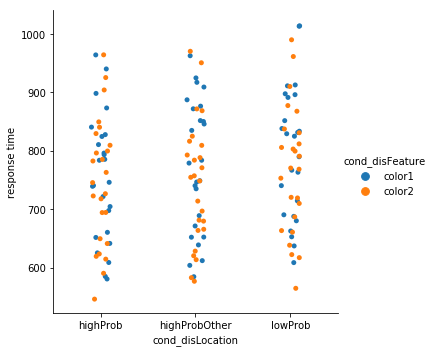

In [9]:
sns.catplot(x="cond_disLocation", y="response time", hue="cond_disFeature", data=dataDis)

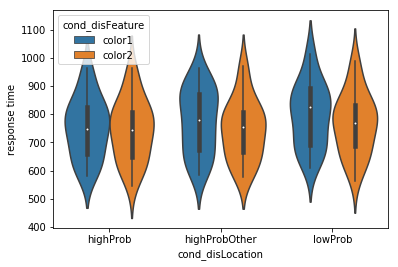

In [10]:
sns.violinplot(x="cond_disLocation", y="response time", hue="cond_disFeature", data=dataDis)

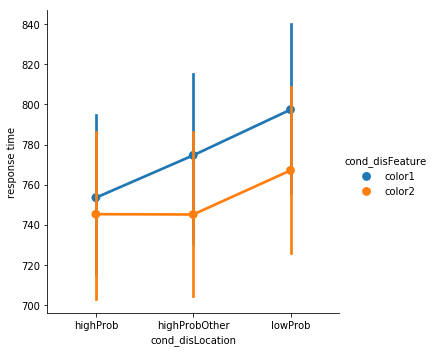

In [11]:
sns.catplot(x="cond_disLocation", y="response time", hue="cond_disFeature", kind="point",
            ci=95, units="response time", data=dataDis)

## Plot with custom error bars

If we want to use custom error bars in a multiline graph, we need to use a graph where we can access the axes. For a bar graph, we can simply use 

Option 1: Stylized entire matplotlib graphs into Seaborn

Option 2: Create seaborn graph and access the axes

#### Option 1

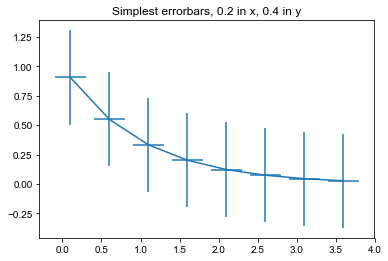

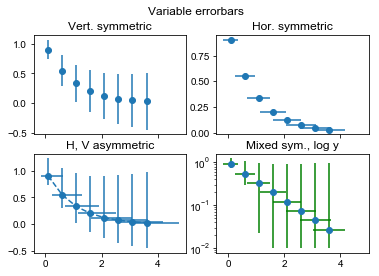

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")

# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
ax = axs[0,0]
ax.errorbar(x, y, yerr=yerr, fmt='o')
ax.set_title('Vert. symmetric')

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
ax.locator_params(nbins=4)

ax = axs[0,1]
ax.errorbar(x, y, xerr=xerr, fmt='o')
ax.set_title('Hor. symmetric')

ax = axs[1,0]
ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')
ax.set_title('H, V asymmetric')

ax = axs[1,1]
ax.set_yscale('log')
# Here we have to be careful to keep all y values positive:
ylower = np.maximum(1e-2, y - yerr)
yerr_lower = y - ylower

ax.errorbar(x, y, yerr=[yerr_lower, 2*yerr], xerr=xerr,
            fmt='o', ecolor='g', capthick=2)
ax.set_title('Mixed sym., log y')

fig.suptitle('Variable errorbars')

# Got the matplotlib figure ready!
# Now, we set the SNS style and make some specific adjustments to the template and plot it
sns.set_style('white', {"axes.spines.right": False, "axes.spines.top": False, "xtick.bottom": True, "ytick.left": True})
plt.show()

#### Option 2

cond_disLocation  cond_disFeature
highProb          color1             107.125460
                  color2             108.741712
highProbOther     color1             113.955457
                  color2             106.494523
lowProb           color1             113.094406
                  color2             108.593162
Name: response time, dtype: float64
[6.293409172, 12.86350914, 9.765396862, 6.605023755, 11.52660614, 7.020881214]


<ErrorbarContainer object of 3 artists>

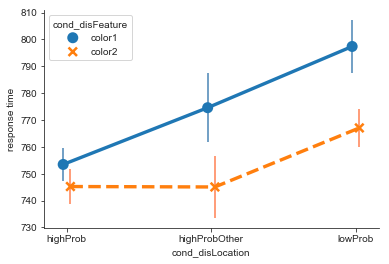

In [13]:
ax = sns.pointplot(x="cond_disLocation", y="response time", hue="cond_disFeature", markers=["o", "x"], linestyles=["-", "--"],
                   ci=None, units="response time", scale=1.25, dodge=True, join=True, data=dataDis)

# Find the x,y coordinates for each point
x_coords, y_coords = [],[]
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)
        
# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the point we're looping over
# Fancy
errors = dataDis.groupby(['cond_disLocation','cond_disFeature']).std()['response time']
print(errors)
# Plain
errorBars = [6.293409172,12.86350914,9.765396862,6.605023755,11.52660614,7.020881214]
print(errorBars)
colors = ['steelblue']*3 + ['coral']*3
ax.errorbar(x_coords, y_coords, yerr=errorBars, ecolor=colors, fmt=' ', zorder=-1, elinewidth=1.5)

## Plotting with aggregated data set

In [14]:
try:
    os.chdir(r'F:\Dropbox\Work\Data\behavioral\attention\StatisticalRegularities\locations\Salience\Exp2\beh')
except:
    os.chdir('/Users/michlf/Dropbox/Work/Data/behavioral/attention/StatisticalRegularities/locations/Salience/Exp2/beh')
print(os.getcwd())

/Users/michlf/Dropbox/Work/Data/behavioral/attention/StatisticalRegularities/locations/Salience/Exp2/beh


In [15]:
import pandas as pd
data2=pd.read_csv("EXP2_JASP_RT.csv", sep=';', decimal=',')
data2.head()

,absent-HL,absent-LL,present-HL,present-LL,absent,cap-diff-HL,cap-diff-LL,AnyOnHighP-HL,AnyOnHighP-LL,AnyOnlowP,...,awareness,awareness_actual,highP-HL-swap,highPOther-HL-swap,lowP-HL-swap,highP-LL-swap,highPOther-LL-swap,lowP-LL-swap,swap,same
0,710.340425,705.029586,724.196545,734.735269,707.685006,-13.856120,-29.705683,712.456853,731.223281,744.644495,...,1,0,719.576828,733.015826,752.560298,742.878974,709.128014,740.122349,716.287372,737.317706
1,768.462447,739.894998,775.344163,762.414334,754.178723,-6.881716,-22.519336,732.254049,781.080696,792.176752,...,0,0,751.210447,789.631005,815.058499,765.071134,704.961505,768.562417,762.104345,772.841742
2,877.995182,866.908612,906.895059,892.869786,872.451897,-28.899877,-25.961175,888.201191,933.030547,908.750504,...,0,0,908.451846,964.450094,930.948941,897.932836,887.436658,885.624043,886.956639,907.022899
3,673.481966,653.207960,706.175530,676.801056,663.344963,-32.693564,-23.593095,686.018181,698.781434,704.592803,...,0,0,704.621712,730.526062,724.007122,680.997978,674.837991,688.959952,677.884373,699.622521
4,837.627827,847.407618,885.832759,868.607076,842.517722,-48.204932,-21.199458,867.819508,878.555456,909.291290,...,0,0,867.158519,890.586997,940.407051,864.900190,874.618902,882.905466,860.007241,887.656504


In [16]:
# Select only relevant data for the analysis
df1 = data2[['absent-HL','absent-LL','present-HL','present-LL']]
df1.head()

,absent-HL,absent-LL,present-HL,present-LL
0,710.340425,705.029586,724.196545,734.735269
1,768.462447,739.894998,775.344163,762.414334
2,877.995182,866.908612,906.895059,892.869786
3,673.481966,653.207960,706.175530,676.801056
4,837.627827,847.407618,885.832759,868.607076


In [17]:
df1 = df1.reset_index().melt(id_vars='index')
df1.tail()

,index,variable,value
91,19,present-LL,917.687918
92,20,present-LL,878.630515
93,21,present-LL,802.525647
94,22,present-LL,957.115483
95,23,present-LL,965.541091


In [18]:
df1.columns = ['subject number', 'condition', 'response time']
df1['subject number'] += 1
df1.head()

,subject number,condition,response time
0,1,absent-HL,710.340425
1,2,absent-HL,768.462447
2,3,absent-HL,877.995182
3,4,absent-HL,673.481966
4,5,absent-HL,837.627827


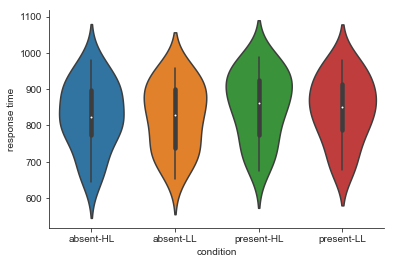

In [19]:
import seaborn as sns
ax = sns.violinplot(x="condition", y="response time", data=df1)

In [20]:
df2 = df1[:]
df2.head()

,subject number,condition,response time
0,1,absent-HL,710.340425
1,2,absent-HL,768.462447
2,3,absent-HL,877.995182
3,4,absent-HL,673.481966
4,5,absent-HL,837.627827


In [21]:
df2['distractor presence'], df2['probability condition'] = df2['condition'].str.split('-', 1).str
df2.head()

,subject number,condition,response time,distractor presence,probability condition
0,1,absent-HL,710.340425,absent,HL
1,2,absent-HL,768.462447,absent,HL
2,3,absent-HL,877.995182,absent,HL
3,4,absent-HL,673.481966,absent,HL
4,5,absent-HL,837.627827,absent,HL


In [22]:
df2 = df2.drop(['condition', 'subject number'],axis=1)
df2['probability condition'] = df2['probability condition'].replace({'LL':'low probability', 'HL':'high probability'})
df2.tail()

,response time,distractor presence,probability condition
91,917.687918,present,low probability
92,878.630515,present,low probability
93,802.525647,present,low probability
94,957.115483,present,low probability
95,965.541091,present,low probability


In [23]:
os.getcwd()

'/Users/michlf/Dropbox/Work/Data/behavioral/attention/StatisticalRegularities/locations/Salience/Exp2/beh'

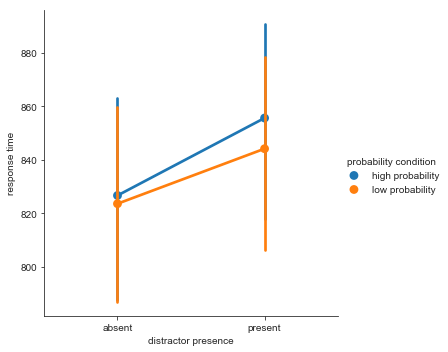

In [24]:
plot1 = sns.catplot(x='distractor presence', y='response time', hue='probability condition', data=df2, kind='point', ci=95, units='response time')
plot1.savefig("plot1.svg", format="svg", dpi=1200) # can do .png, .pdf, .ps, .eps or .svg

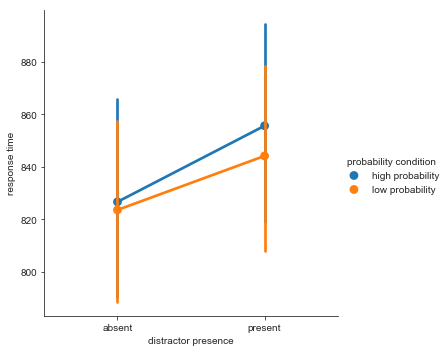

In [25]:
import matplotlib.pyplot as plt
sns.catplot(x='distractor presence', y='response time', hue='probability condition', data=df2, kind='point', ci=95, units='response time')
plt.savefig("plot2.pdf", format="pdf", dpi=1200)

In [26]:
df2.head()

,response time,distractor presence,probability condition
0,710.340425,absent,high probability
1,768.462447,absent,high probability
2,877.995182,absent,high probability
3,673.481966,absent,high probability
4,837.627827,absent,high probability


## Plot custom errorbars using Cousineau/Morey

In [27]:
# Can also find this function as withinCI.py in misc->statsFunctions on Github
from scipy.stats import t
from math import sqrt
def confidence_int(data, p_value = 0.05, morey = True):
    """
    
    """
    
    # normalize the data by subtracting the participants mean performance from each observation, and then add the grand mean to each observation
    ind_mean = data.mean(axis = 1).reshape(data.shape[0],1)
    grand_mean = data.mean(axis = 1).mean()
    data = data - ind_mean + grand_mean
    
    t_value = abs(t.ppf([p_value], data.shape[0]-1)[0])
    
    # calculate standard 95% CI
    CI = data.std(axis = 0)/sqrt(data.shape[0])*t_value
    
    # correct CI according confidence_into Morey 2008
    if morey:
        CI = CI*(data.shape[1]/float((data.shape[1] - 1))) 
    
    return CI 

In [28]:
dataDisCI = pd.pivot_table(data[ ( data.cond_disPresent == "present") & (data["Search RT > 200"] == 1) & (data.correct == 1)],
                         values="responseTime", index="subject_nr", columns="cond_disLocation")
dataDisCI.values

array([[ 901.01869926,  887.54656381,  910.46963828],
       [ 624.20122444,  633.48263208,  675.43179486],
       [ 611.47116969,  615.97400065,  629.63710866],
       [ 812.50426599,  830.11810541,  841.10429461],
       [ 856.47415674,  893.74116251,  890.14351285],
       [ 699.31942442,  715.88764661,  725.24226158],
       [ 695.80978645,  676.64229311,  716.68731004],
       [ 811.46318486,  839.85268057,  853.00393356],
       [ 751.72170848,  799.02449846,  771.02981565],
       [ 952.1114503 ,  937.40201898, 1001.93912307],
       [ 944.72781912,  966.26797684,  986.23828825],
       [ 783.00821108,  846.60417011,  818.910011  ],
       [ 804.81509374,  810.86199534,  812.30141922],
       [ 646.31146145,  658.50246181,  671.74891762],
       [ 816.78214602,  833.26940682,  867.24045328],
       [ 587.46160662,  589.8191309 ,  634.82449289],
       [ 630.21767069,  632.37961347,  650.20534911],
       [ 728.4080722 ,  744.55147547,  804.04887428],
       [ 654.8554833 ,  692.

In [29]:
withinCIs = confidence_int(dataDisCI.values)
withinCIs

array([4.64652754, 7.57134502, 6.04046631])

In [30]:
dataDisCI = pd.melt( dataDisCI.reset_index(),id_vars="subject_nr", var_name="cond_disLocation",
                  value_vars=["highProb","highProbOther","lowProb"], value_name="responseTime")
dataDisCI.head()

,subject_nr,cond_disLocation,responseTime
0,1,highProb,901.018699
1,2,highProb,624.201224
2,3,highProb,611.471170
3,4,highProb,812.504266
4,5,highProb,856.474157


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

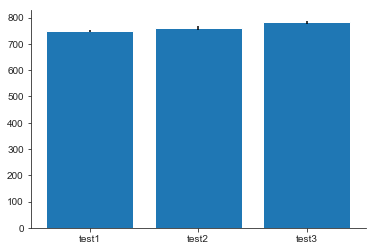

In [31]:
import matplotlib.pyplot as plt
means = dataDisCI.groupby( ["cond_disLocation"])["responseTime"].mean().values
plt.bar(np.arange(len(means)), means, yerr=withinCIs)
plt.xticks(np.arange(len(means)), ('test1','test2','test3'))
plt.set_ylim(700,800)
sns.set_style('white', {"axes.spines.right": False, "axes.spines.top": False, "xtick.bottom": True, "ytick.left": True})

In [ ]:
import seaborn as sns
axes = sns.barplot(x="cond_disLocation", y="responseTime", data=dataDisCI, ci=None, yerr=withinCIs)
axes.set_ylim(700,800)